In [2]:
import cv2
import torch
import numpy as np
import torchvision.transforms as T
from torchvision.utils import draw_bounding_boxes
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("dataset/0_number.png").convert("RGB") 


image_tensor = T.ToTensor()(image) * 255

# Загрузим изображение и шаблон
image = cv2.imread('dataset/0_number.png', 0)
template = cv2.imread('number_patterns/5/0.png', 0)

# Размер шаблона

w, h = template.shape[::-1]

In [3]:
# Выполним сопоставление
res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Установим порог обнаружения
threshold = 0.8
loc = np.where(res >= threshold)

# Обведём найденные участки
for pt in zip(*loc[::-1]):
    print(pt)
    print((pt[0] + w, pt[1] + h))

(62, 0)
(79, 29)


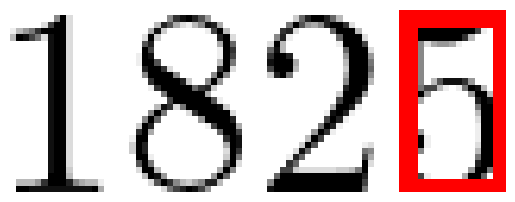

In [4]:
bbox = torch.tensor(
    [[pt[0], pt[1], pt[0] + w, pt[1] + h]]
)  # Example rectangle coordinates

# Define color and label
colors = ["red"]
# labels = ["Detected Object"]

# Draw bounding box on the image
image_with_bbox = draw_bounding_boxes(
    image_tensor.byte(), 
    bbox, 
    # labels=labels, 
    colors=colors, 
    width=3
)

# Convert to PIL image for visualization
image_with_bbox_pil = T.ToPILImage()(image_with_bbox)

# Show the image
plt.imshow(image_with_bbox_pil)
plt.axis("off")
plt.show()